<a href="https://colab.research.google.com/github/QuangDuyxyz/AI/blob/main/AI_W7_17_03_23_HW_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np
url='/content/Housing.csv'
data= pd.read_csv(url)
data.head()
     

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<function matplotlib.pyplot.show(close=None, block=None)>

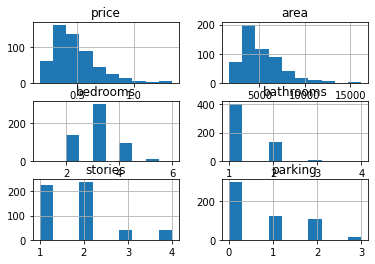

In [2]:
data.hist()
plt.show
     

In [3]:
correlation = data.corr()
print(correlation)
     

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<Axes: >

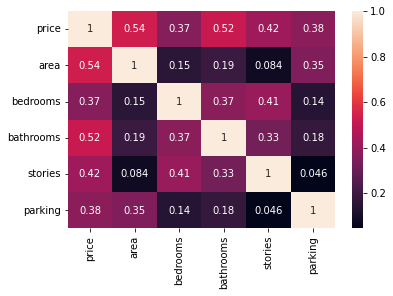

In [4]:
sns.heatmap (correlation,annot=True)

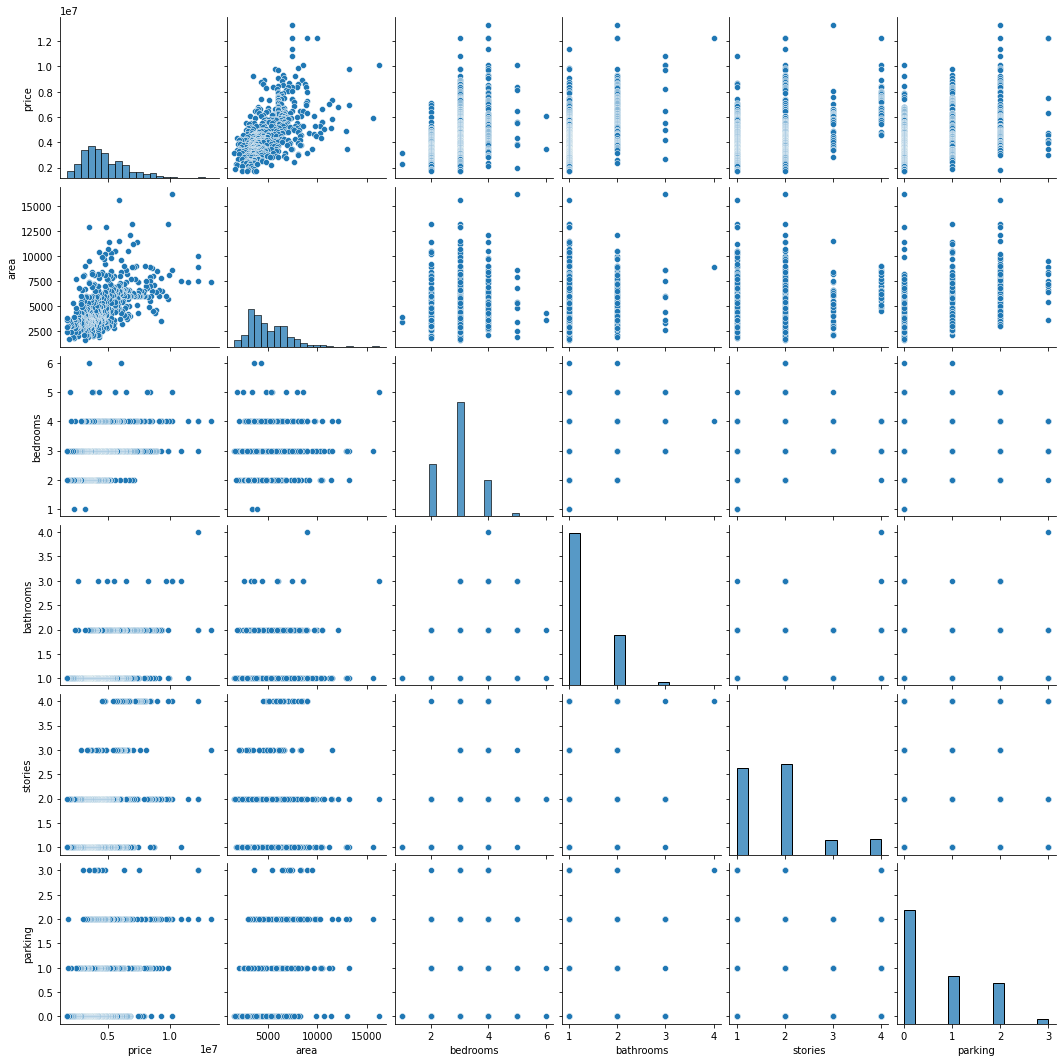

In [5]:

sns.pairplot(data)

In [6]:
model= linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['area']),y=data['price'])
print('he so intercept la:',model.intercept_)
print('he so coeffient la:', model.coef_)

he so intercept la: 2387308.48239643
he so coeffient la: [461.97489427]


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


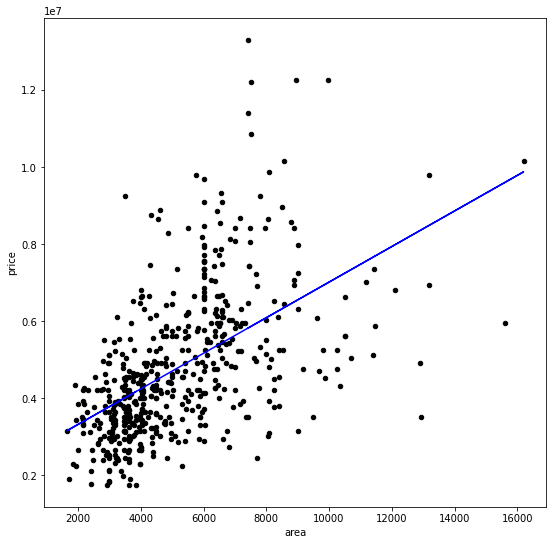

In [7]:
model.score(X=pd.DataFrame(data['area']),y=data['price'])
y_pred = model.predict(X=pd.DataFrame(data['area']))
data.plot(kind='scatter',x='area',y='price',figsize=(9,9),color='black')
plt.plot(data['area'],y_pred,color='blue')

In [8]:
X=pd.DataFrame([data['area'],data['area']**2,data['area']**3,data['area']**4,data['area']**5,
                data['area']**6,data['area']**7,data['area']**8,data['area']**9,data['area']**10]).T
model.fit(X,y=data['price'])
print('intercept cua mo hinh:',model.intercept_)
print('coeffinet cua mo hinh:',model.coef_)
print('Do chinh xac cua mo hinh:', model.score(X,y=data['price']))
     

intercept cua mo hinh: 1942004.113154489
coeffinet cua mo hinh: [ 5.46219207e-05  2.51513295e-01 -3.14386000e-05  1.07565322e-09
  8.21565038e-15  1.36557432e-14 -2.74502643e-14 -6.63358257e-15
 -2.63114183e-15  2.20934382e-14]
Do chinh xac cua mo hinh: 0.3503364718886245


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


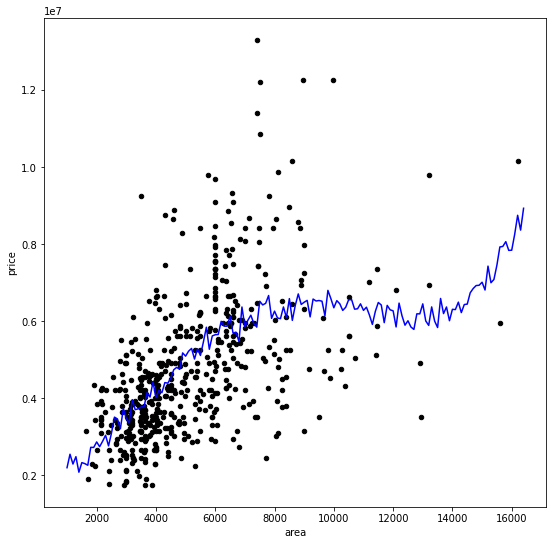

In [9]:
range = np.arange (1000,16500,100)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,
                        range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X=X_range)
data.plot(kind='scatter',x='area',y='price',figsize=(9,9),color='black')
plt.plot(range, y_pred, color='blue')